## Importações

In [1]:
from funcoes.funcoes import *

pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv('dados/selected_data.zip')

In [3]:
df.shape

(466285, 105)

---

## 1. Calculando a Probabilidade de Inadimplência


### 1.1 Análise por regressão logística

A regressão logística, frequentemente referida como modelo logit, constitui uma técnica de classificação dentro do paradigma de aprendizado de máquina supervisionado, destinada à predição de variáveis dependentes categóricas. Especificamente, esta metodologia é empregada para estimar a probabilidade de uma observação pertencer a uma entre várias classes discretas, atribuindo-a, assim, a uma categoria específica com base em uma saída intrinsecamente discreta. Devido à sua simplicidade, eficácia e flexibilidade, a regressão logística é amplamente reconhecida e adotada em uma diversidade de domínios para abordar questões de classificação binária ou multiclasse.

Este modelo logit distingue-se por sua capacidade de processar variáveis independentes de natureza contínua ou binária, transformando seu resultado por meio da função logística (ou sigmoidal), de modo que a probabilidade predita de ocorrência de um evento situe-se no intervalo (0, 1). A aplicação prática deste modelo ao conjunto de dados selecionado visa elucidar sua eficiência na discriminação entre diferentes categorias de resposta, baseando-se em um conjunto de preditores.


#### 1.1.1 Separação dos dados

Agora, os dados serão separados em treino e teste, sendo a classe minoritária distribuida de maneira aproximada em ambos.

In [4]:
# separando dados de treino e teste

X = df.drop(['target'], axis = 1)
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [5]:
X_train.to_csv('dados/X_train.csv', index = False)
X_test.to_csv('dados/X_test.csv', index = False)
y_train.to_csv('dados/y_train.csv', index = False)
y_test.to_csv('dados/y_test.csv', index = False)

In [6]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test =  y_test.values

In [7]:
# instanciando modelo

logregpd = LogisticRegressionPValues()


# fit do modelo

logregpd.fit(X_train, y_train)

In [8]:
tabela = tabela_sumario(df, logregpd)
tabela

,nome_feature,coeficiente,p_valor
0,intercept,-1.371397,NaN
1,grade:A,1.120239,1.705517e-30
2,grade:B,0.891872,1.198637e-42
3,grade:C,0.706093,1.383027e-31
4,grade:D,0.529578,2.517464e-20
5,grade:E,0.344007,1.869595e-11
6,grade:F,0.181411,6.870495e-04
7,home_ownership:OWN,0.080838,1.659498e-04
8,home_ownership:MORTGAGE,0.118092,3.618968e-18
9,addr_state:NM_VA,0.038921,2.552631e-01


### 1.2 P-valor

Uma metodologia que pode ser adotada com o objetivo de refinar a seleção de variáveis explicativas envolve a avaliação da significância estatística dos coeficientes associados a cada variável, mediante a análise dos valores-p obtidos. Utilizando-se de uma análise de regressão logística multivariada, os valores-p correspondentes são computados para cada coeficiente. Neste contexto, variáveis cujos coeficientes apresentem valores-p inferiores ao limiar de 0,05 — indicando, portanto, uma significância estatística — serão mantidas no modelo analítico. Em contrapartida, variáveis cujos coeficientes não atendam a esse critério de significância serão excluídas da modelagem.

Adicionalmente, no contexto de variáveis dummy (utilizadas para representar categorias de uma variável categórica em modelos quantitativos), uma abordagem de conservação é proposta. Caso ao menos uma das categorias representadas por variáveis dummy demonstre significância estatística, conforme evidenciado por um valor-p inferior a 0,05, todas as demais categorias (dummies) relativas à mesma variável categórica serão preservadas no modelo. Tal procedimento justifica-se pela importância de manter a integridade analítica da representação variável, assegurando que a influência total da variável categórica sobre a variável dependente seja adequadamente considerada na análise.

Pela análise de significância nenhuma das variáveis deveria ser retirada.

In [9]:
tabela[tabela.p_valor < 0.05]

,nome_feature,coeficiente,p_valor
1,grade:A,1.120239,1.705517e-30
2,grade:B,0.891872,1.198637e-42
3,grade:C,0.706093,1.383027e-31
4,grade:D,0.529578,2.517464e-20
5,grade:E,0.344007,1.869595e-11
6,grade:F,0.181411,6.870495e-04
7,home_ownership:OWN,0.080838,1.659498e-04
8,home_ownership:MORTGAGE,0.118092,3.618968e-18
10,addr_state:NY,0.061426,1.807077e-02
11,addr_state:OK_TN_MO_LA_MD_NC,0.055567,2.495962e-02


---
## 2. Classificação e métricas avaliativas

Na fase subsequente ao entendimento contextual do negócio, à análise exploratória dos dados e à sua preparação adequada, avançamos para a etapa de modelagem e avaliação. O artefato central desta etapa é o desenvolvimento de um modelo preditivo, especificamente adotando-se a Regressão Logística. A eficácia deste modelo é avaliada por intermédio de um conjunto de métricas criteriosas, descritas a seguir:

- **Acurácia:** Esta métrica reflete a proporção dos casos em que as previsões realizadas pelo modelo coincidem com os resultados reais, abrangendo tanto previsões verdadeiramente positivas quanto verdadeiramente negativas. Representa um indicador geral da performance do modelo.


- **Precisão:** Define-se como a razão entre o número de previsões verdadeiramente positivas e o total de previsões classificadas como positivas pelo modelo. Esta métrica é particularmente relevante em contextos onde os falsos positivos representam uma consequência significativa.


- **Recall (Sensibilidade):** Esta métrica avalia, dentre todos os casos que efetivamente pertencem à classe positiva, quantos foram corretamente identificados pelo modelo. É de vital importância em situações onde não se pode negligenciar os falsos negativos.


- **F1-score:** Representa a média harmônica entre precisão e recall, oferecendo um balanço entre estas duas métricas. Um F1-score de 1 indica uma precisão e recall perfeitos, enquanto um valor de 0 aponta para a pior performance possível. É especialmente útil para comparar modelos quando existe uma necessidade de equilibrar recall e precisão.


- **Matriz de Confusão:** Esta ferramenta tabular resume o desempenho de um algoritmo de classificação, oferecendo uma visão detalhada tanto das previsões corretas quanto das incorretas, categorizadas conforme cada classe analisada. Facilita o entendimento não apenas da eficácia do modelo, mas também dos tipos específicos de erros que ele tende a cometer.


- **ROC-AUC:** As métricas Características de Operação do Receptor (ROC) e Área Sob a Curva (AUC) são amplamente utilizadas para avaliar modelos de classificação. A AUC, em particular, mede a capacidade do modelo de diferenciar entre classes distintas, com valores mais elevados indicando uma distinção mais clara entre categorias, como clientes de alto e baixo risco.


- **Gini:** O coeficiente de Gini é uma métrica que avalia a capacidade de um modelo de risco de crédito para distinguir entre adimplentes e inadimplentes, variando de 0 (nenhuma discriminação) a 1 (discriminação perfeita).


- **Kolmogorov-Smirnov (KS):** O teste de Kolmogorov-Smirnov quantifica a maior discrepância entre as distribuições cumulativas de adimplentes e inadimplentes, indicando a eficácia do modelo em separar estes grupos. 


Essas métricas, ao serem aplicadas de forma conjunta, proporcionam uma compreensão abrangente sobre a performance do modelo preditivo, permitindo identificar áreas de excelência e aspectos susceptíveis de otimização.

### 2.1 Avalição do modelo

In [10]:
y_hat_test = logregpd.model.predict(X_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
y_hat_test_proba = logregpd.model.predict_proba(X_test)
y_hat_test_proba

array([[0.2453238 , 0.7546762 ],
       [0.15663301, 0.84336699],
       [0.21978771, 0.78021229],
       ...,
       [0.03217588, 0.96782412],
       [0.03786509, 0.96213491],
       [0.05548594, 0.94451406]])

In [12]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.7546762 , 0.84336699, 0.78021229, ..., 0.96782412, 0.96213491,
       0.94451406])

Comparação da precisão do conjunto de treino e do conjunto de teste para verificar se há overfitting. Como os valores são próximos, não há overfiting (uma grande diferença nos dois valores pode indicar overfitting ou underfitting).

In [13]:
print('Score de treino: {:.4f}'.format(logregpd.model.score(X_train, y_train)))
print('Score de teste: {:.4f}'.format(logregpd.model.score(X_test, y_test)))

Score de treino: 0.8907
Score de teste: 0.8907


In [14]:
loan_data_targets_test_temp = pd.DataFrame(y_test)

df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,0,0.754676
1,1,0.843367
2,1,0.780212
3,1,0.946560
4,1,0.933495


In [15]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

#### 2.1.1 Acurácia

In [16]:
print('Acurácia: {0:0.4f}'.format(accuracy_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test)))

Acurácia: 0.5853


#### 2.1.2 Precisão

In [17]:
print('Precisão: {0:0.4f}'.format(precision_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test)))

Precisão: 0.9429


#### 2.1.3 Recall

In [18]:
print('Recall: {0:0.4f}'.format(recall_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test)))

Recall: 0.5688


#### 2.1.4 F1-score

In [19]:
print('F1-score: {0:0.4f}'.format(f1_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test)))

F1-score: 0.7096


#### 2.1.5 Matriz de confusão

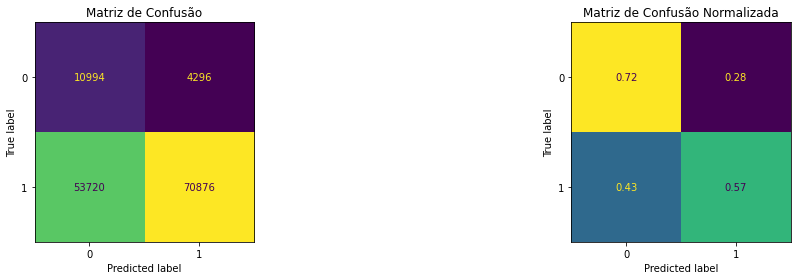

In [20]:
cm = confusion_matrix(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

ConfusionMatrixDisplay(cm).plot(ax=axs[0], colorbar=False)
axs[0].set_title('Matriz de Confusão')

ConfusionMatrixDisplay(cm_normalized, display_labels=None).plot(ax=axs[1], colorbar=False)
axs[1].set_title('Matriz de Confusão Normalizada')

plt.tight_layout()
plt.show()

#### 2.1.6 ROC

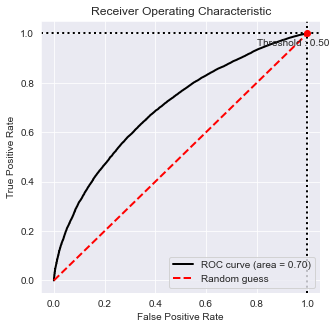

In [21]:
bc = BinaryClassification(y_test, df_actual_predicted_probs.y_hat_test_proba, labels = [0, 1])
plt.figure(figsize = (5, 5))
bc.plot_roc_curve()
plt.show()

#### Threshold de classificação
Há um threshold de classificação de 0,5 comumente utilizado e que também será aplicado neste caso.

- Classe 1 - probabilidade de ser bom é prevista se probabilidade > 0,5
- Classe 0 - probabilidade de ser ruim é prevista se probabilidade < 0,5

O dataframe abaixo mostra a probablidade de uma pessoa apresentar risco de crédito (ruim) ou não (bom), segundo a classificação do modelo.

In [22]:
y_pred_prob = logregpd.model.predict_proba(X_test)

y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns=['Prob_Ruim(0)', 'Prob_Bom(1)'])
y_pred_prob_df

,Prob_Ruim(0),Prob_Bom(1)
0,0.245324,0.754676
1,0.156633,0.843367
2,0.219788,0.780212
3,0.053440,0.946560
4,0.066505,0.933495
...,...,...
139881,0.059933,0.940067
139882,0.055035,0.944965
139883,0.032176,0.967824
139884,0.037865,0.962135


#### 2.1.7 AUC

In [23]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6991546420345796

#### 2.1.8 Gini

Gini = (ROC-AUC * 2 -1)

In [24]:
Gini = 0.7 * 2 - 1
Gini

0.3999999999999999

#### 2.1.9 KS - Kolmogorov–Smirnov


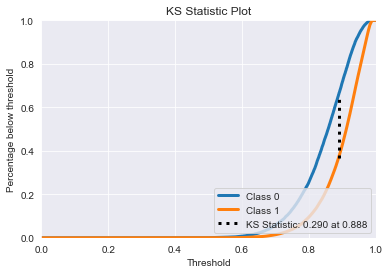

In [25]:
skplt.plot_ks_statistic(y_test, y_pred_prob)
plt.show()

In [26]:
# salvando modelo

pickle.dump(logregpd, open('modelos/modelo_pi.sav', 'wb'))


---